In [1]:
import tensorflow.compat.v1 as tf

In [3]:
tf.disable_v2_behavior()

### Load dataset

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Prepare dataset

In [6]:
X_data = iris.data[:100]
Y_data = iris.target[:100]
print(Y_data.shape, X_data.shape)
print(Y_data)

(100,) (100, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
# # 0 1 2

# 1 0 0 = 0
# 1 0 0 = 0
# 0 1 0 = 1
# 0 0 1 = 2
# 1 0 0
# 0 1 0
# 1 0 0 
# 0 2 1
# 2 1 0 
# = = 
# 9 8

In [8]:
import pandas as pd
Ydata = pd.get_dummies(Y_data).values
# Ydata

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Ydata, test_size=.20,
                                               random_state=0, shuffle=True)

In [10]:
print(xtrain.shape, xtest.shape, ytrain.shape)

(80, 4) (20, 4) (80, 2)


### Define Hyperparameters

In [11]:
learning_rate = 0.01
epochs = 100 #no of iterations
n_hidden = 20 #No. of nodes on hidden layer
n_input = 4 #No of nodes on input layer = no. of features
n_output = 2 # No. of nodes on output layer = no. of classes

In [12]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

- NN Structure 
<img src="ab.png">

In [13]:
w1 = tf.Variable(tf.random_normal([n_input,n_hidden]))
w2 = tf.Variable(tf.random_normal([n_hidden,n_output]))

b1 = tf.Variable(tf.random_normal([n_hidden]))
b2 = tf.Variable(tf.random_normal([n_output]))

### Feed Forward

In [14]:
# Hidden layer
l1_submission = tf.add(tf.matmul(X, w1), b1)
layer1 = tf.nn.relu(l1_submission)

output_layer = tf.add(tf.matmul(layer1, w2),b2)

### Define Cost function and Optimization Algorithm

<img src="CE.png">

In [15]:
# pred = tf.sigmoid(output_layer)
# cost = -tf.reduce_sum(Y*tf.log(pred) + (1-Y)*tf.log(1-pred))

In [16]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    labels=Y, logits=output_layer))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Run Graph

In [17]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
cc = []
for epoch in range(epochs):
    _, c = sess.run([optimizer, cost], feed_dict = {X:xtrain, Y:ytrain})
    cc.append(c)
    if epoch%10==0:
        print("Epoch:{} Cost:{}".format(epoch, c))

print("Trainin Finished!")

Epoch:0 Cost:0.3294181227684021
Epoch:10 Cost:0.06736691296100616
Epoch:20 Cost:0.05286335200071335
Epoch:30 Cost:0.04503157362341881
Epoch:40 Cost:0.039432547986507416
Epoch:50 Cost:0.035165347158908844
Epoch:60 Cost:0.03184974193572998
Epoch:70 Cost:0.029144415631890297
Epoch:80 Cost:0.026910919696092606
Epoch:90 Cost:0.025110458955168724
Trainin Finished!


In [20]:
# cc

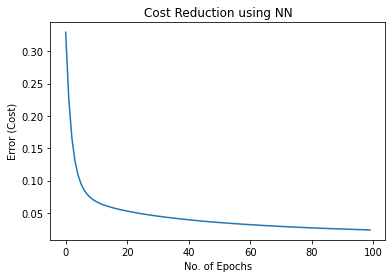

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(100), cc)
plt.xlabel("No. of Epochs")
plt.ylabel("Error (Cost)")
plt.title("Cost Reduction using NN")
plt.show()

### Decode Predictions

In [33]:
pred = tf.sigmoid(output_layer)
predictions = sess.run(tf.argmax(pred,1), feed_dict = {X:xtest, Y:ytest})

In [38]:
predictions

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
# prob = sess.run(pred, feed_dict = {X:xtest, Y:ytest})
# prob

In [41]:
actual = sess.run(tf.argmax(Y,1), feed_dict={Y:ytest})

In [46]:
import numpy as np
df = pd.DataFrame()
df["Actual"] = actual
df["Pred"] = predictions
df.head()

Actual  Pred
0       0     0
1       1     1
2       0     0
3       1     1
4       1     1

### Compare outputs & Get accuracy

In [57]:
correct = sess.run(tf.equal(actual, predictions))
# correct[0]=False
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [58]:
to_float = sess.run(tf.cast(correct,"float"))
to_float

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

In [59]:
accuracy = sess.run(tf.reduce_mean(to_float))
accuracy

1.0